<a href="https://colab.research.google.com/github/Jayaprakash1710/Computer-Vision-Ninjacart/blob/main/Ninjacart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!unzip /content/ninjacart_data.zip

Archive:  /content/ninjacart_data.zip
replace ninjacart_data/test/indian market/bhl.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/indi

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

import os
import glob #makes is easy to navigate folders
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [19]:
class_dirs = os.listdir("/content/ninjacart_data/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/ninjacart_data/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

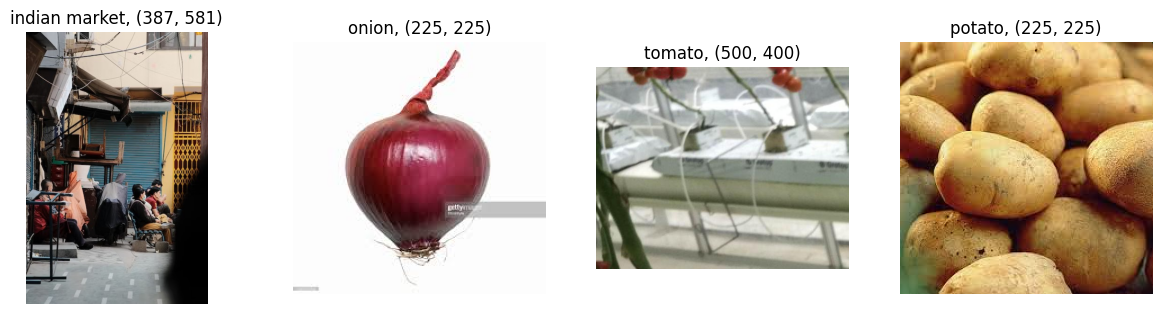

In [20]:
## Viz Random Sample from each class

plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

Count of training samples per class:
            class  count
0  indian market    599
1          onion    849
2         tomato    789
3         potato    898


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

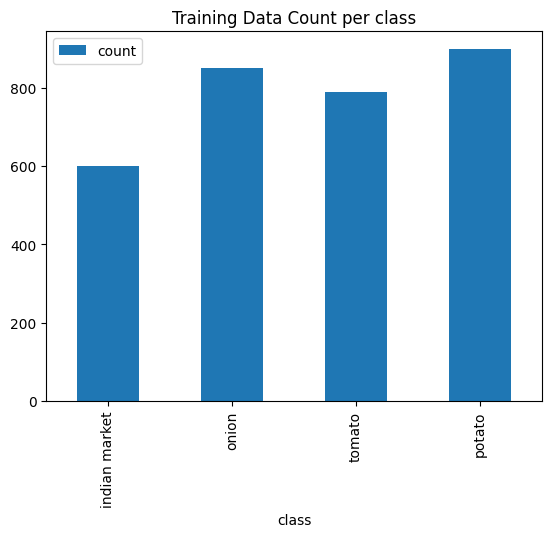

In [21]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

In [22]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "/content/ninjacart_data/train", shuffle = True,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "/content/ninjacart_data/test", shuffle = False,
)


Loading Train Data...
Found 3135 files belonging to 4 classes.

Loading Test Data...
Found 351 files belonging to 4 classes.


In [23]:
height, width = 128, 128
# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), # Shape Preprocessing
        layers.Rescaling(1.0/255), # Value Preprocessing
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

# CNN:

In [24]:
num_classes = 10
hidden_size = 256

model = keras.Sequential(
    name="model_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=hidden_size, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

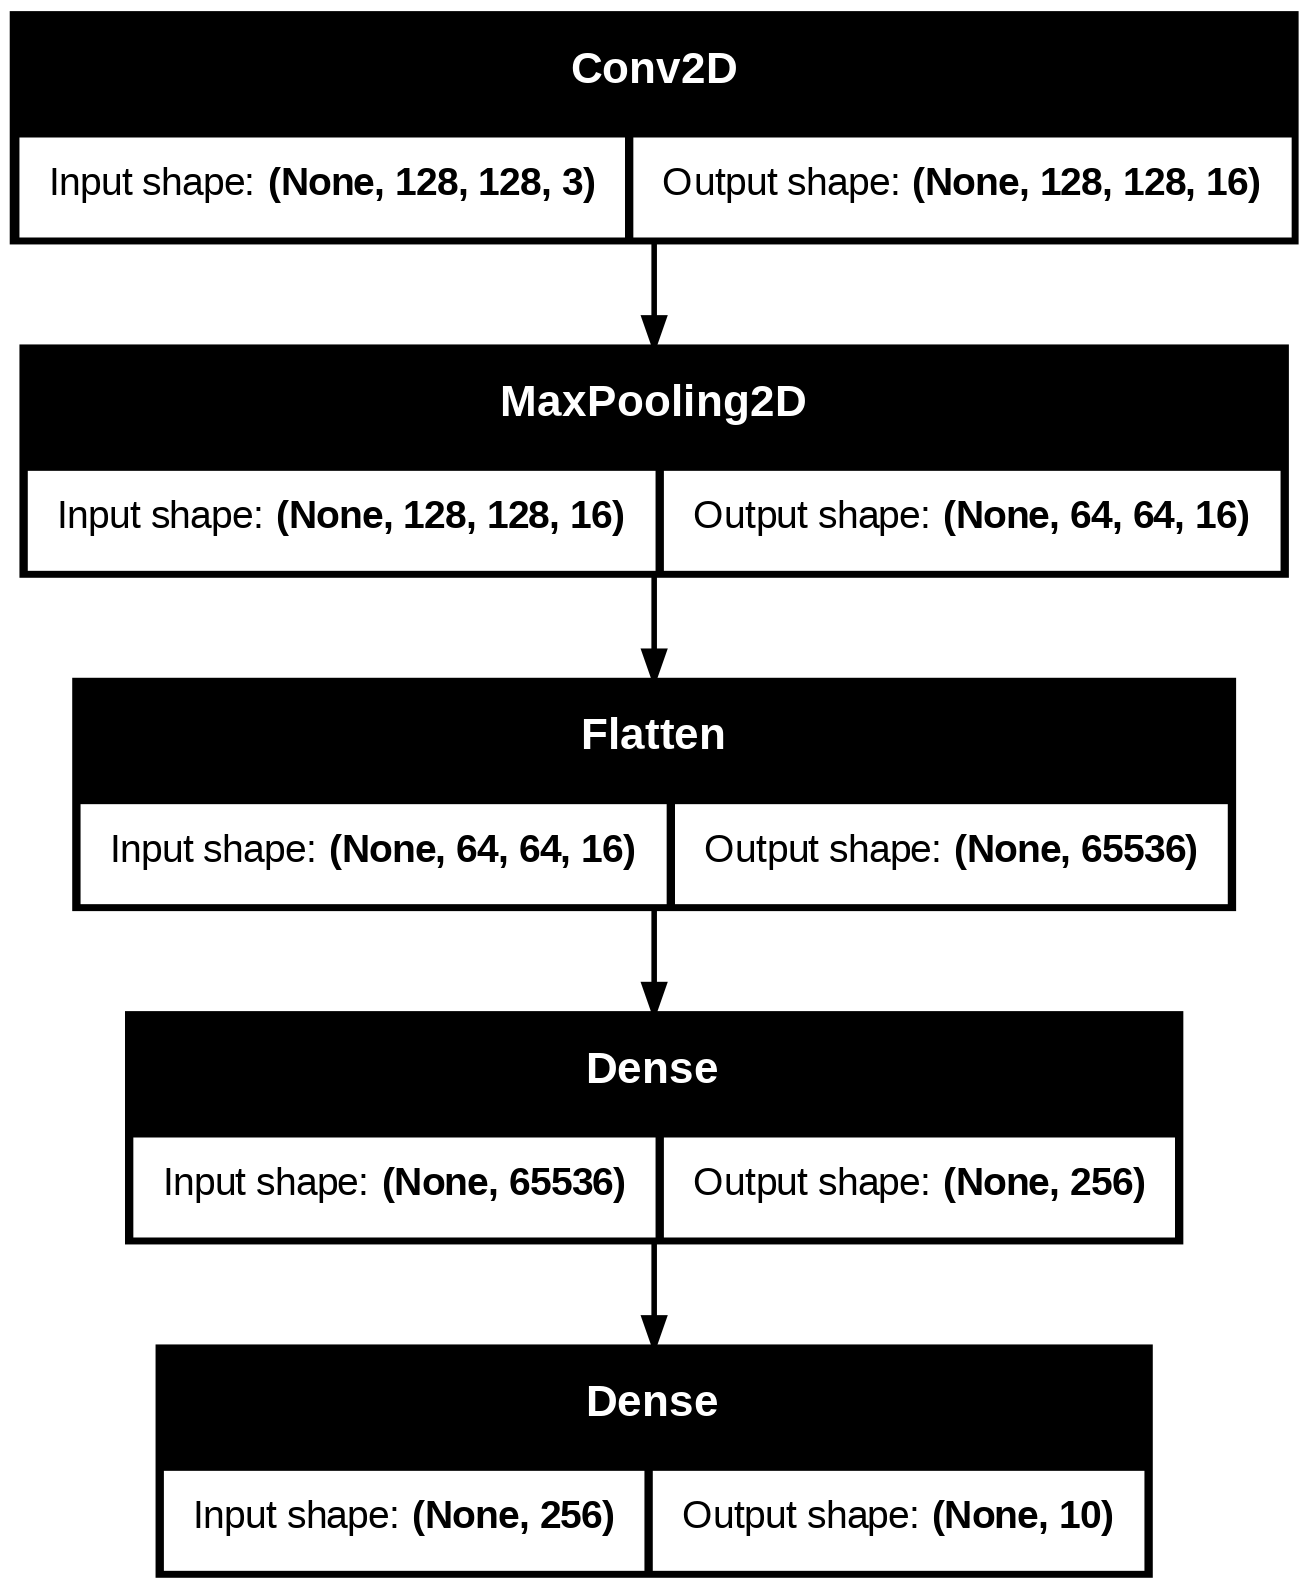

In [25]:
tf.keras.utils.plot_model(model, to_file="model_cnn.png", show_shapes=True)

In [26]:
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
epochs = 10
model_fit = model.fit(train_ds, epochs=epochs)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 626ms/step - accuracy: 0.4723 - loss: 4.6651
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 607ms/step - accuracy: 0.8475 - loss: 0.4224
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 602ms/step - accuracy: 0.9138 - loss: 0.2670
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 633ms/step - accuracy: 0.9621 - loss: 0.1318
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 615ms/step - accuracy: 0.9798 - loss: 0.0976
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - accuracy: 0.9892 - loss: 0.0510
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 610ms/step - accuracy: 0.9905 - loss: 0.0356
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 626ms/step - accuracy: 0.9930 - loss: 0.0279
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 620ms/step - accuracy: 0.9937 - loss: 0.0276
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 612ms/step - accuracy: 0.9928 - loss: 0.0372


In [30]:
# load model from pretrained checkpoints (optional)
# model.load_weights("/content/Saved Models/L1_cnn_model.ckpt")

true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names
predicted_categories = tf.argmax(y_pred, axis=1)

test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step

Test Accuracy: 70.94%



In [32]:
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    # run model prediction and obtain probabilities
    y_pred = model.predict(ds)
    # get list of predicted classes by taking argmax of the probabilities(y_pred)
    predicted_categories = tf.argmax(y_pred, axis=1)
    # create list of all "y"s labels, by iterating over test dataset
    true_categories = tf.concat([y for x, y in ds], axis=0)
    # generate confusion matrix and plot it
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step


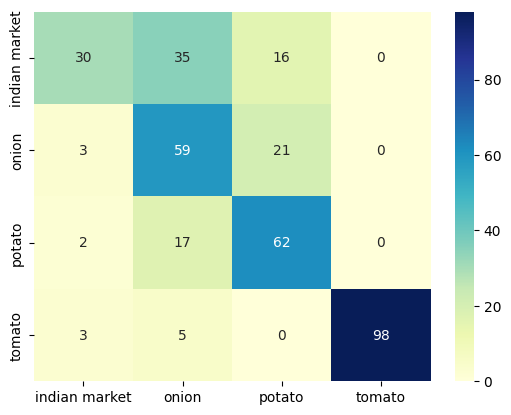

In [33]:
ConfusionMatrix(model, test_ds, test_data.class_names)

In [34]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                class_names[true_label]),
                                color=color)

# function to plot barplot of class probabilities (pred_array)
def plot_value_array(pred_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step


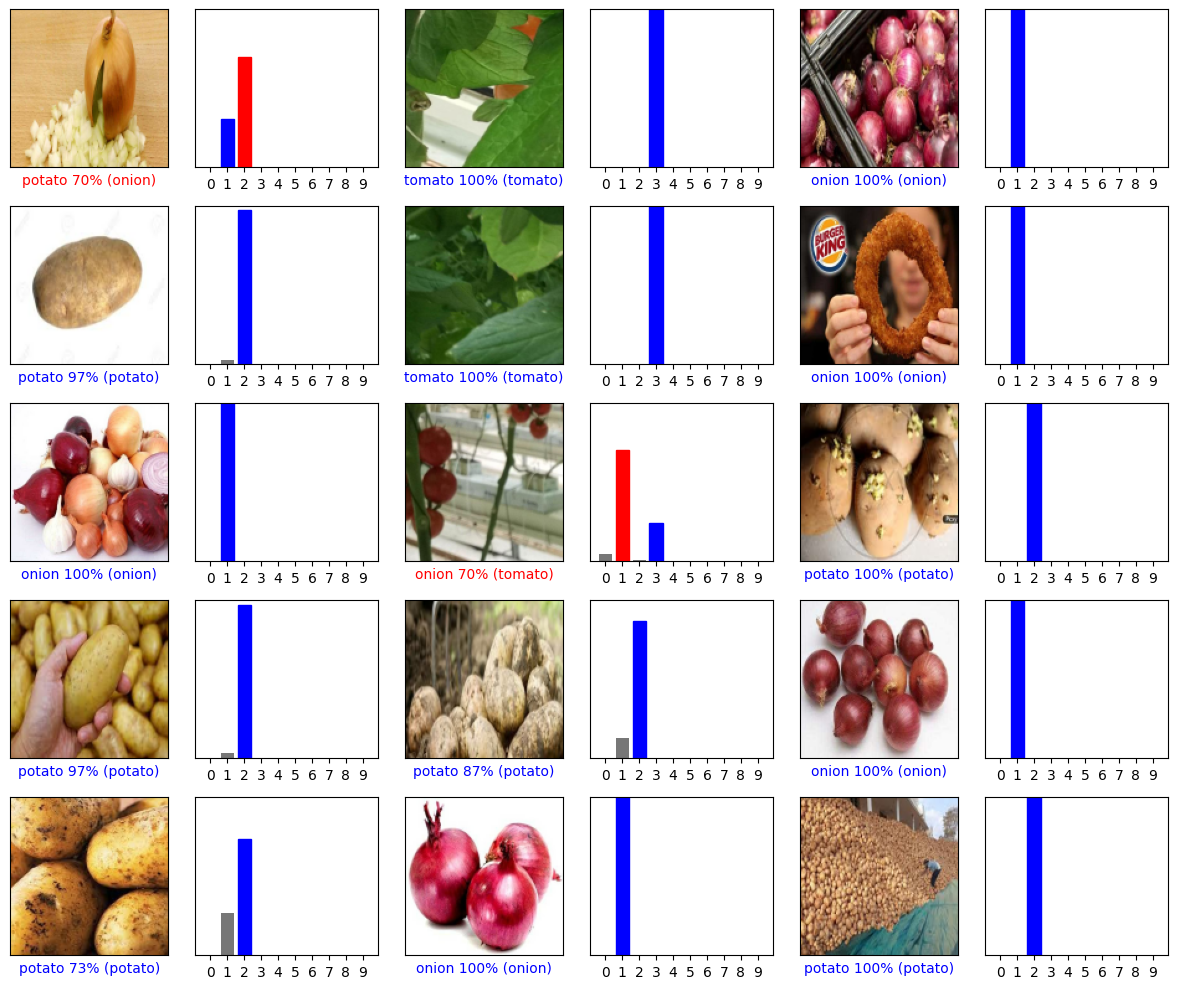

In [35]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(y_pred[index], true_categories[index], images[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(y_pred[index], true_categories[index])
plt.tight_layout()
plt.show()